In [1]:
# importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import timedelta
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [2]:
# importing the datasets as Panda dataframes
corona = pd.read_csv("./Data/novel-corona-virus-2019-dataset/covid_19_data.csv")
df_deaths = pd.read_csv("./Data/Deaths due to Coronavirus in India.csv", header = None)
df_cases = pd.read_csv("./Data/Coronavirus cases in India.csv", header = None)
df_district = pd.read_csv("./Data/Corona virus in India, district wise.csv", header = None)

In [3]:
# printing some basic statistics
print("Size/Shape of the dataset: ", corona.shape)
print("\nChecking for null values:\n", corona.isnull().sum())
print("\nChecking Data-type of each column:\n", corona.dtypes)

#Dropping column as SNo is of no use, and replacing empty strings with nan in "Province/State"
corona.drop(["SNo"], 1, inplace = True)
corona["Province/State"].replace('', np.nan, inplace = True)

#Converting "Observation Date" into Datetime format
corona["ObservationDateConverted"] = pd.to_datetime(corona["ObservationDate"])

#Grouping different types of cases as per the date
datewise = corona.groupby(["ObservationDateConverted"]).agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})
convert_dict = {'Confirmed': int, 'Recovered': int, 'Deaths': int}
datewise = datewise.astype(convert_dict)

# printing the first 5 entries in the worldwide database
datewise.head()

# printing some statistics about the cases in India
confirmed = 0
rec = 0
deaths = 0
date = []
patients = []

for index, row in corona.iterrows(): 
    if row["Country/Region"] == "India":
        confirmed = row["Confirmed"]
        rec = row["Recovered"]
        deaths = row["Deaths"]
        if row["ObservationDate"] not in date and row["Confirmed"] not in patients:
            date.append(row["ObservationDate"])
        if row["Confirmed"] not in patients:
            patients.append(row["Confirmed"])

print("\nTotal number of cases worldwide: " + str(len(corona)) + ". There have been a total of " + str(int(confirmed)) + " cases in India. " + "Although " + str(int(rec)) + " patients have recovered, " + str(int(deaths)) + " have died.\n")

print("Basic Information")
print("Totol number of countries with Disease Spread: ", len(corona["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ", datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ", datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ", datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ", (datewise["Confirmed"].iloc[-1] - datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ", datewise["Recovered"].iloc[-1] + datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ", int(np.round(datewise["Confirmed"].iloc[-1] / datewise.shape[0])))
print("Approximate number of Recovered Cases per Day around the World: ", int(np.round(datewise["Recovered"].iloc[-1] / datewise.shape[0])))
print("Approximate number of Death Cases per Day around the World: ", int(np.round(datewise["Deaths"].iloc[-1] / datewise.shape[0])))
print("Approximate number of Confirmed Cases per hour around the World: ", int(np.round(datewise["Confirmed"].iloc[-1] / ((datewise.shape[0]) * 24))))
print("Approximate number of Recovered Cases per hour around the World: ", int(np.round(datewise["Recovered"].iloc[-1] / ((datewise.shape[0]) * 24))))
print("Approximate number of Death Cases per hour around the World: ", int(np.round(datewise["Deaths"].iloc[-1] / ((datewise.shape[0]) * 24))))

# clearing the memory
del rec
del deaths

Size/Shape of the dataset:  (9735, 8)

Checking for null values:
 SNo                   0
ObservationDate       0
Province/State     4433
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Total number of cases worldwide: 9735. There have been a total of 987 cases in India. Although 84 patients have recovered, 24 have died.

Basic Information
Totol number of countries with Disease Spread:  212
Total number of Confirmed Cases around the World:  660706
Total number of Recovered Cases around the World:  139415
Total number of Deaths Cases around the World:  30652
Total number of Active Cases around the World:  490639
Total number of Closed Cases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text xticklabel objects>)

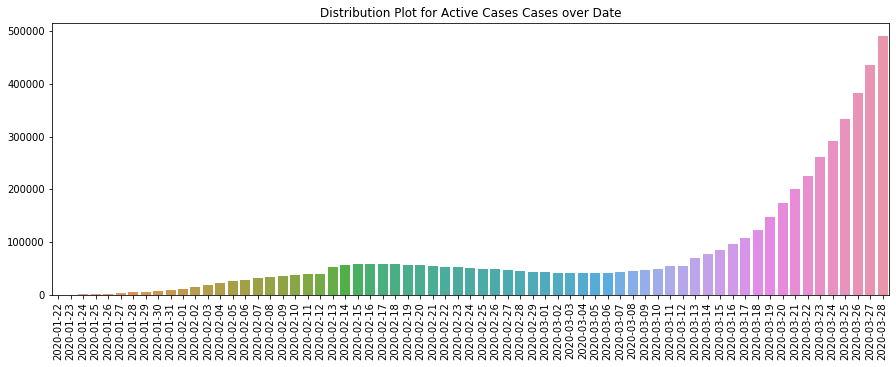

In [4]:
plt.figure(figsize = (15,5))
sns.barplot(x = datewise.index.date, y = datewise["Confirmed"] - datewise["Recovered"] - datewise["Deaths"])
plt.title("Distribution Plot for Active Cases Cases over Date")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text xticklabel objects>)

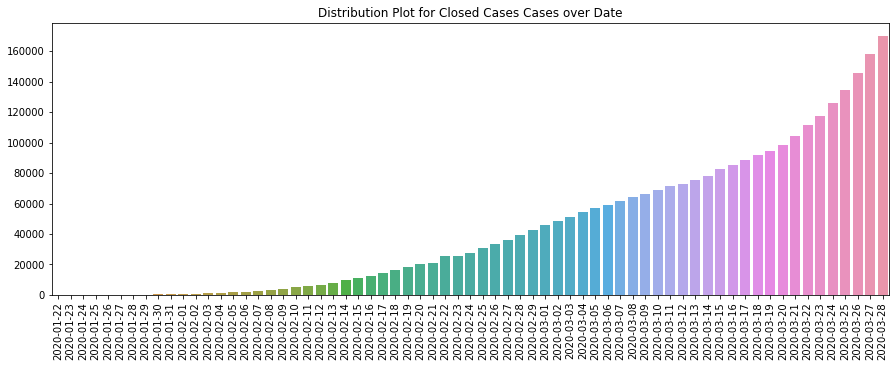

In [5]:
plt.figure(figsize = (15,5))
sns.barplot(x = datewise.index.date, y = datewise["Recovered"] + datewise["Deaths"])
plt.title("Distribution Plot for Closed Cases Cases over Date")
plt.xticks(rotation=90)

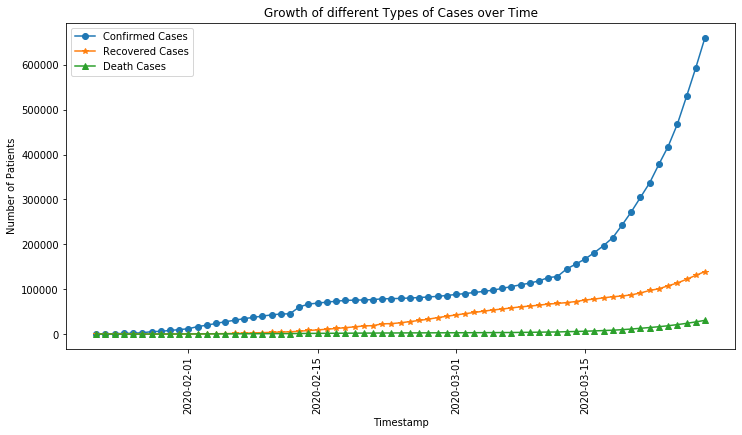

In [6]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

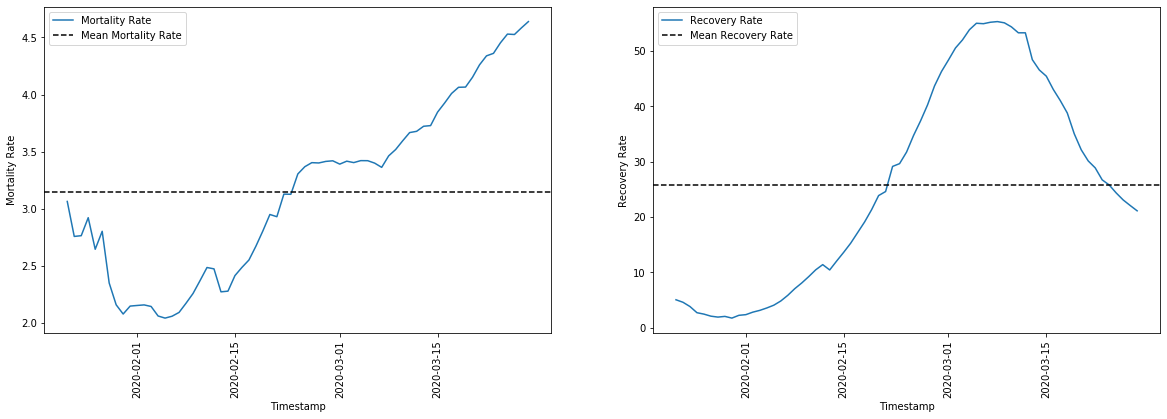

In [7]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate')
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate")
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

Average increase in number of Confirmed Cases every day:  9853
Average increase in number of Recovered Cases every day:  2080
Average increase in number of Deaths Cases every day:  457


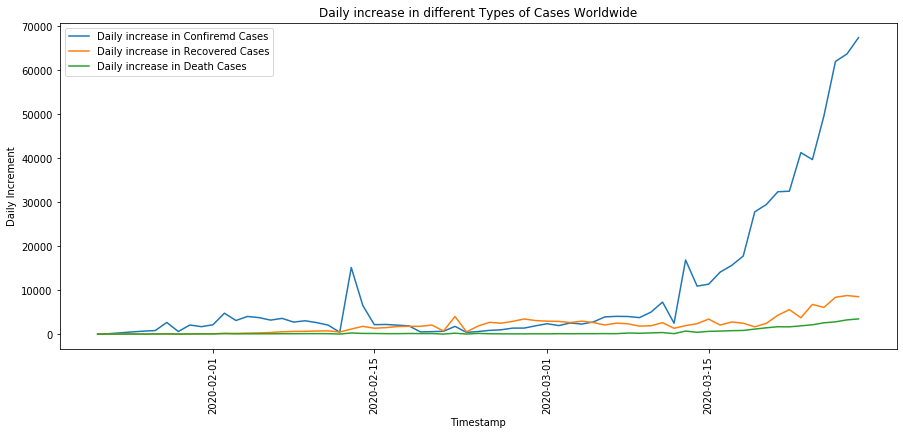

In [8]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases")
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases")
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death Cases")
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase in different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

print("Average increase in number of Confirmed Cases every day: ", int(np.round(datewise["Confirmed"].diff().fillna(0).mean())))
print("Average increase in number of Recovered Cases every day: ", int(np.round(datewise["Recovered"].diff().fillna(0).mean())))
print("Average increase in number of Deaths Cases every day: ", int(np.round(datewise["Deaths"].diff().fillna(0).mean())))

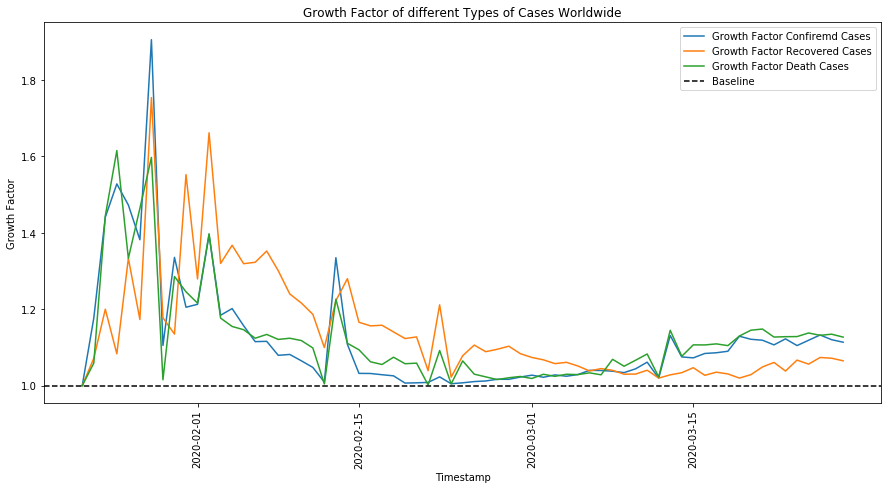

In [9]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases")
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases")
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases")
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()

Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

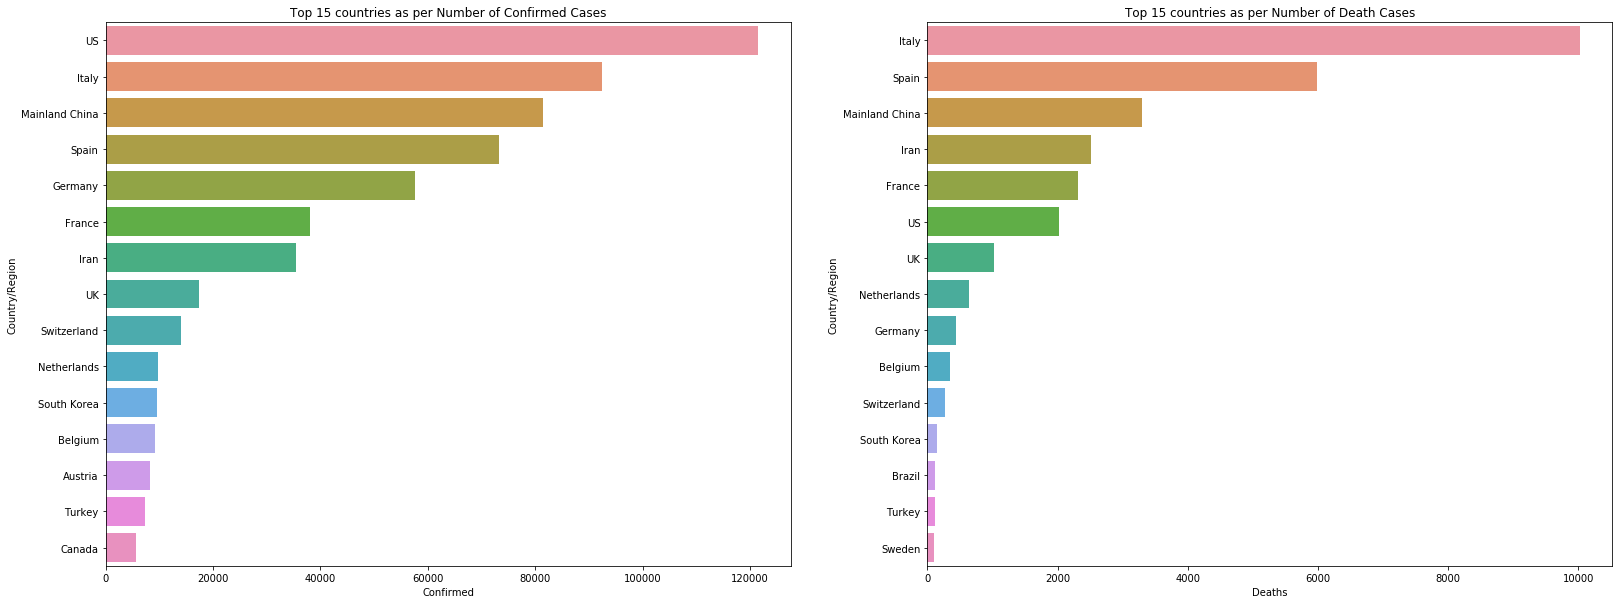

In [10]:
#Calculating countrywise Moratality and Recovery Rate
countrywise = corona[corona["ObservationDate"] == corona["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"] = (countrywise["Deaths"] / countrywise["Confirmed"]) * 100
countrywise["Recovery"] = (countrywise["Recovered"] / countrywise["Confirmed"]) * 100

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (27,10))
top_15_confirmed = countrywise.sort_values(["Confirmed"], ascending = False).head(15)
top_15_deaths = countrywise.sort_values(["Deaths"],ascending = False).head(15)
sns.barplot(x = top_15_confirmed["Confirmed"],y = top_15_confirmed.index, ax = ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x = top_15_deaths["Deaths"],y = top_15_deaths.index,ax = ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

Text(0.5, 0, 'Recovery (in Percentage)')

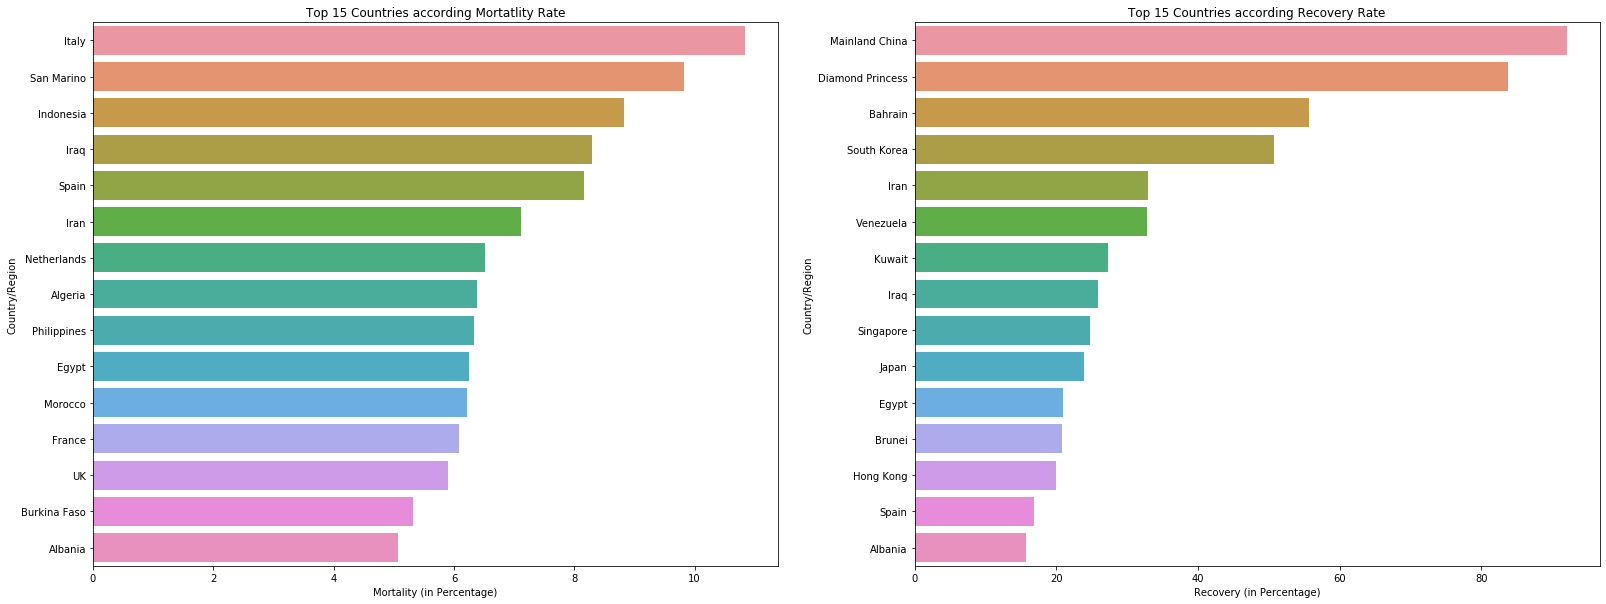

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (27,10))
countrywise_plot_mortal = countrywise[countrywise["Confirmed"] > 100].sort_values(["Mortality"], ascending = False).head(15)
sns.barplot(x = countrywise_plot_mortal["Mortality"],y = countrywise_plot_mortal.index, ax = ax1)
ax1.set_title("Top 15 Countries according Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover = countrywise[countrywise["Confirmed"] > 100].sort_values(["Recovery"], ascending = False).head(15)
sns.barplot(x = countrywise_plot_recover["Recovery"],y = countrywise_plot_recover.index, ax = ax2)
ax2.set_title("Top 15 Countries according Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

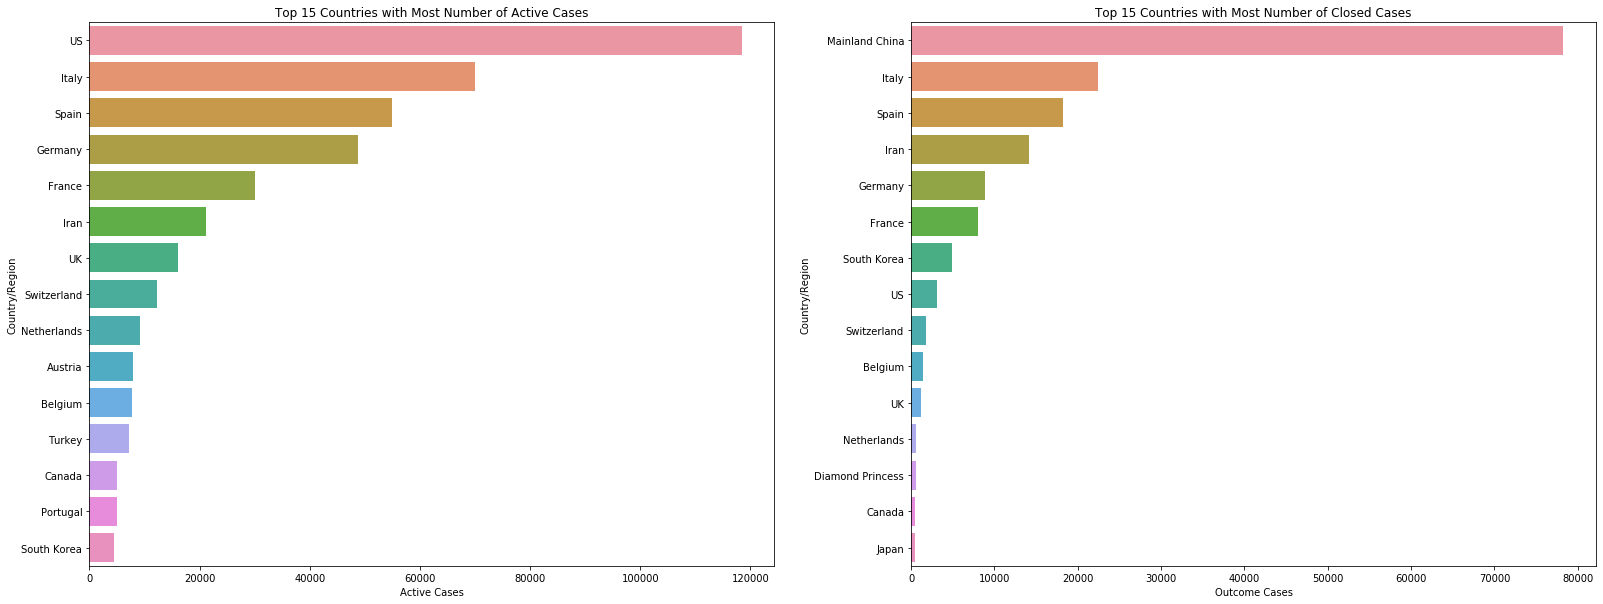

In [12]:
no_recovered_countries = countrywise[(countrywise["Confirmed"] > 50) & (countrywise["Recovered"] == 0)][["Confirmed", "Deaths"]]
no_recovered_countries["Mortality Rate"] = (no_recovered_countries["Deaths"] / no_recovered_countries["Confirmed"]) * 100
no_recovered_countries[no_recovered_countries["Mortality Rate"] > 0].sort_values(["Mortality Rate"], ascending=False)

no_deaths = countrywise[(countrywise["Confirmed"] > 100) & (countrywise["Deaths"] == 0)]
no_deaths[no_deaths["Recovery"] > 0].sort_values(["Recovery"], ascending = False).drop(["Mortality"], 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (27,10))
countrywise["Active Cases"] = (countrywise["Confirmed"] - countrywise["Recovered"] - countrywise["Deaths"])
countrywise["Outcome Cases"] = (countrywise["Recovered"] + countrywise["Deaths"])
top_15_active = countrywise.sort_values(["Active Cases"],ascending = False).head(15)
top_15_outcome = countrywise.sort_values(["Outcome Cases"],ascending = False).head(15)
sns.barplot(x = top_15_active["Active Cases"],y = top_15_active.index,ax = ax1)
sns.barplot(x = top_15_outcome["Outcome Cases"],y = top_15_outcome.index,ax = ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

Text(0.5, 1.0, 'Bottom 15 countries as per Confirmed Cases per Day having more than 1000 Confirmed Cases')

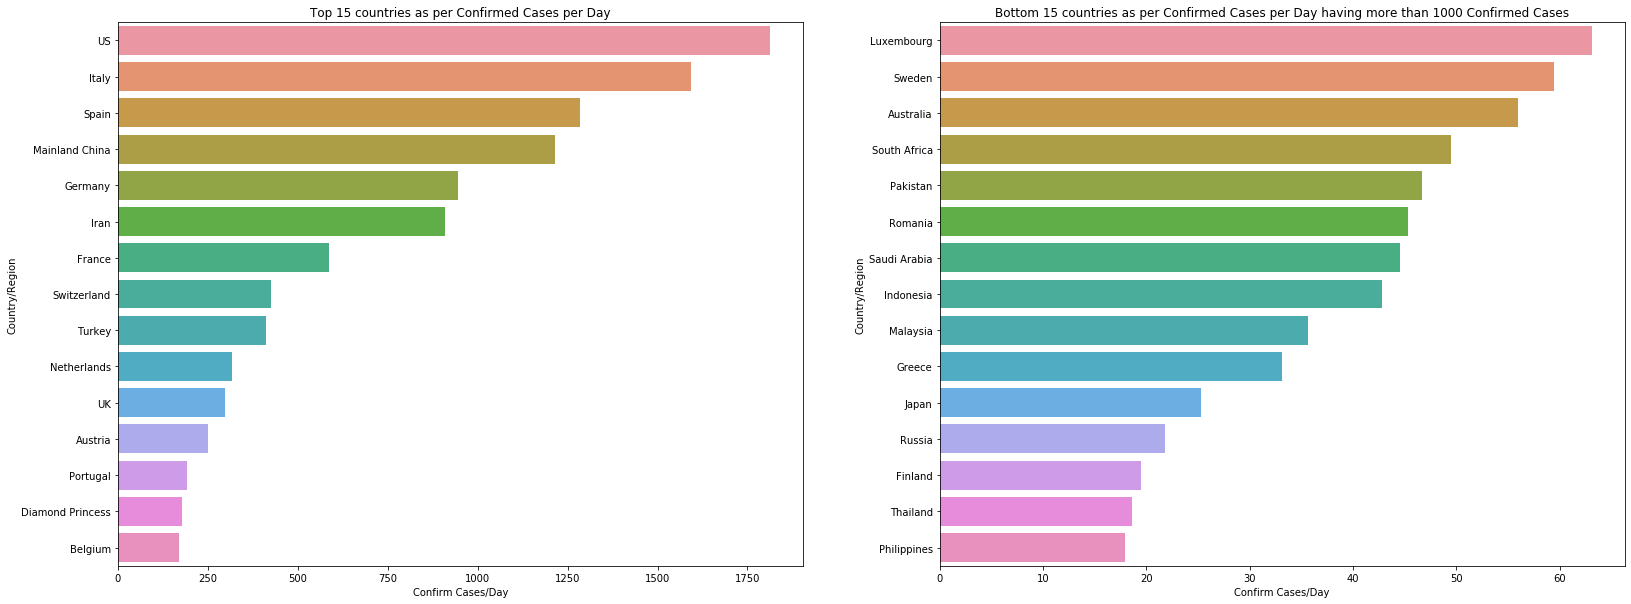

In [13]:
country_date = corona.groupby(["Country/Region", "ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate = []
for country in countrywise.index:
    days = country_date.ix[country].shape[0]
    confirm_rate.append((countrywise.ix[country]["Confirmed"]) / days)
countrywise["Confirm Cases/Day"] = confirm_rate

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (27,10))
top_15_ccpd = countrywise.sort_values(["Confirm Cases/Day"], ascending = False).head(15)
sns.barplot(y = top_15_ccpd.index,x = top_15_ccpd["Confirm Cases/Day"], ax = ax1)
ax1.set_title("Top 15 countries as per Confirmed Cases per Day")
bottom_15_ccpd = countrywise[countrywise["Confirmed"] > 1000].sort_values(["Confirm Cases/Day"], ascending = False).tail(15)
sns.barplot(y = bottom_15_ccpd.index,x = bottom_15_ccpd["Confirm Cases/Day"], ax = ax2)
ax2.set_title("Bottom 15 countries as per Confirmed Cases per Day having more than 1000 Confirmed Cases")

Mean Survival Probability across all countries 97.63946306790777
Median Survival Probability across all countries 99.22879177377892
Mean Death Probability across all countries 2.3605369320922307
Median Death Probability across all countries 0.7712082262210771


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

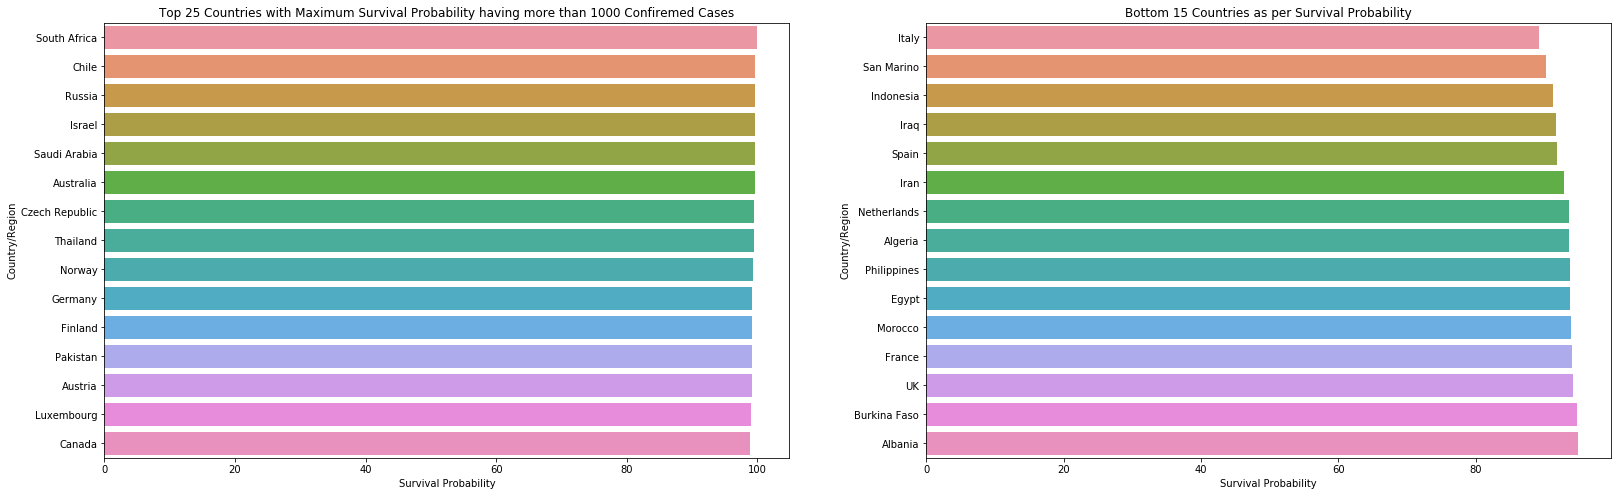

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (27,8))
countrywise["Survival Probability"] = (1 - (countrywise["Deaths"] / countrywise["Confirmed"])) * 100
top_25_survival = countrywise[countrywise["Confirmed"] > 1000].sort_values(["Survival Probability"], ascending = False).head(15)
sns.barplot(x = top_25_survival["Survival Probability"],y = top_25_survival.index,ax = ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries', countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries', countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries', 100 - countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries', 100 - countrywise["Survival Probability"].median())

Bottom_5_countries = countrywise[countrywise["Confirmed"] > 100].sort_values(["Survival Probability"], ascending = True).head(15)
sns.barplot(x = Bottom_5_countries["Survival Probability"],y = Bottom_5_countries.index,ax = ax2)
plt.title("Bottom 15 Countries as per Survival Probability")

In [15]:
china_data = corona[corona["Country/Region"] == "Mainland China"]
Italy_data = corona[corona["Country/Region"] == "Italy"]
US_data = corona[corona["Country/Region"] == "US"]
spain_data = corona[corona["Country/Region"] == "Spain"]
india_data = corona[corona["Country/Region"] == "India"]
rest_of_world = corona[(corona["Country/Region"] != "Mainland China") & (corona["Country/Region"] != "Italy") & (corona["Country/Region"] != "US") & (corona["Country/Region"] != "Spain") & (corona["Country/Region"] != "India")]

datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})
datewise_Spain = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})
datewise_India = india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})
datewise_restofworld = rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})

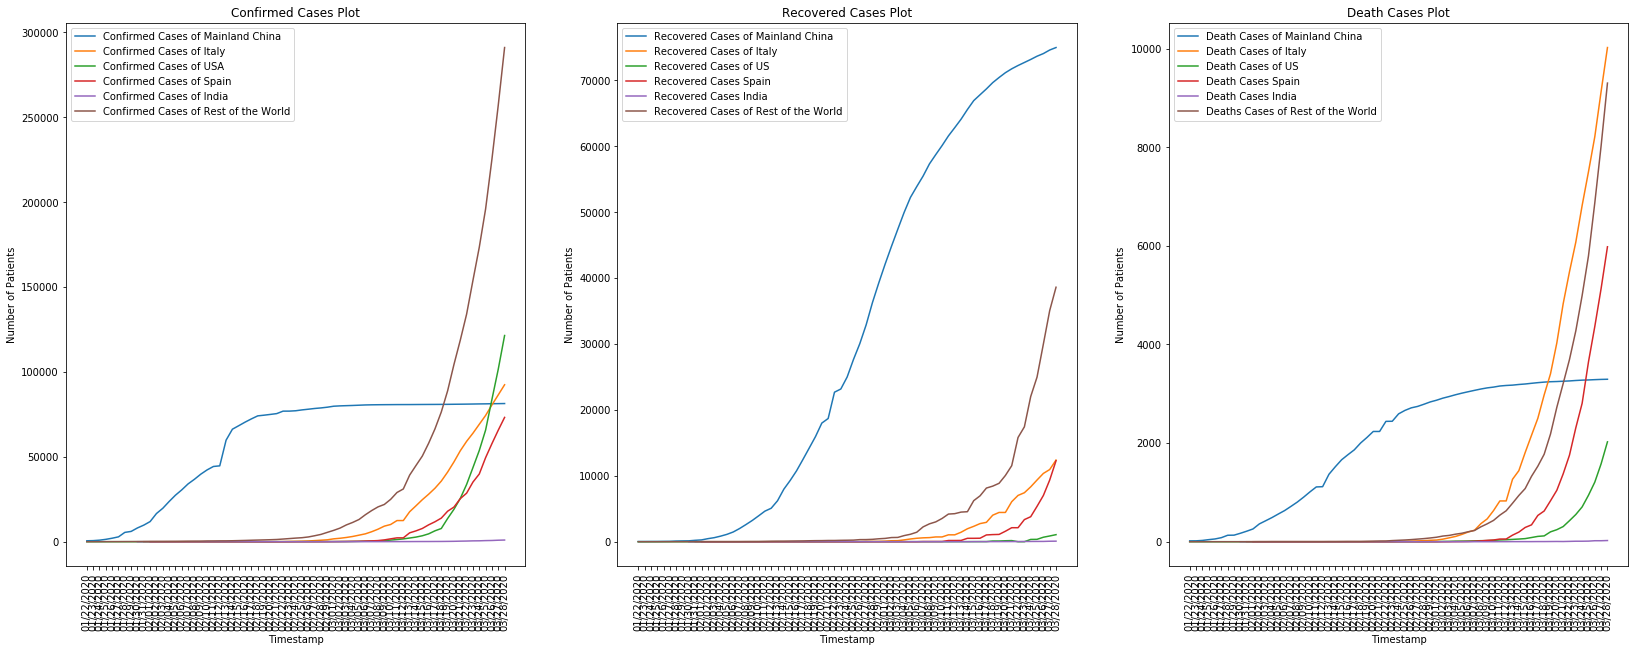

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(28,10))
ax1.plot(datewise_china["Confirmed"], label = "Confirmed Cases of Mainland China")
ax1.plot(datewise_Italy["Confirmed"], label = "Confirmed Cases of Italy")
ax1.plot(datewise_US["Confirmed"], label = "Confirmed Cases of USA")
ax1.plot(datewise_Spain["Confirmed"], label = "Confirmed Cases of Spain")
ax1.plot(datewise_India["Confirmed"], label = "Confirmed Cases of India")
ax1.plot(datewise_restofworld["Confirmed"], label = "Confirmed Cases of Rest of the World")
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
ax2.plot(datewise_china["Recovered"], label = "Recovered Cases of Mainland China")
ax2.plot(datewise_Italy["Recovered"], label = "Recovered Cases of Italy")
ax2.plot(datewise_US["Recovered"], label = "Recovered Cases of US")
ax2.plot(datewise_Spain["Recovered"], label = "Recovered Cases Spain")
ax2.plot(datewise_India["Recovered"], label = "Recovered Cases India")
ax2.plot(datewise_restofworld["Recovered"], label = "Recovered Cases of Rest of the World")
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
ax3.plot(datewise_china["Deaths"], label = 'Death Cases of Mainland China')
ax3.plot(datewise_Italy["Deaths"], label = 'Death Cases of Italy')
ax3.plot(datewise_US["Deaths"], label = 'Death Cases of US')
ax3.plot(datewise_Spain["Deaths"], label = 'Death Cases Spain')
ax3.plot(datewise_India["Deaths"], label = 'Death Cases India')
ax3.plot(datewise_restofworld["Deaths"], label = "Deaths Cases of Rest of the World")
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)

In [17]:
datewise_china["Mortality"] = (datewise_china["Deaths"] / datewise_china["Confirmed"]) * 100
datewise_Italy["Mortality"] = (datewise_Italy["Deaths"] / datewise_Italy["Confirmed"]) * 100
datewise_US["Mortality"] = (datewise_US["Deaths"] / datewise_US["Confirmed"])  * 100
datewise_Spain["Mortality"] = (datewise_Spain["Deaths"] / datewise_Spain["Confirmed"]) * 100
datewise_India["Mortality"] = (datewise_India["Deaths"] / datewise_India["Confirmed"]) * 100
datewise_restofworld["Mortality"] = (datewise_restofworld["Deaths"] / datewise_restofworld["Confirmed"]) * 100

datewise_china["Recovery"] = (datewise_china["Recovered"] / datewise_china["Confirmed"]) * 100
datewise_Italy["Recovery"] = (datewise_Italy["Recovered"] / datewise_Italy["Confirmed"]) * 100
datewise_US["Recovery"] = (datewise_US["Recovered"] / datewise_US["Confirmed"]) * 100
datewise_Spain["Recovery"] = (datewise_Spain["Recovered"] / datewise_Spain["Confirmed"]) * 100
datewise_India["Recovery"] = (datewise_India["Recovered"] / datewise_India["Confirmed"]) * 100
datewise_restofworld["Recovery"] = (datewise_restofworld["Recovered"] / datewise_restofworld["Confirmed"]) * 100

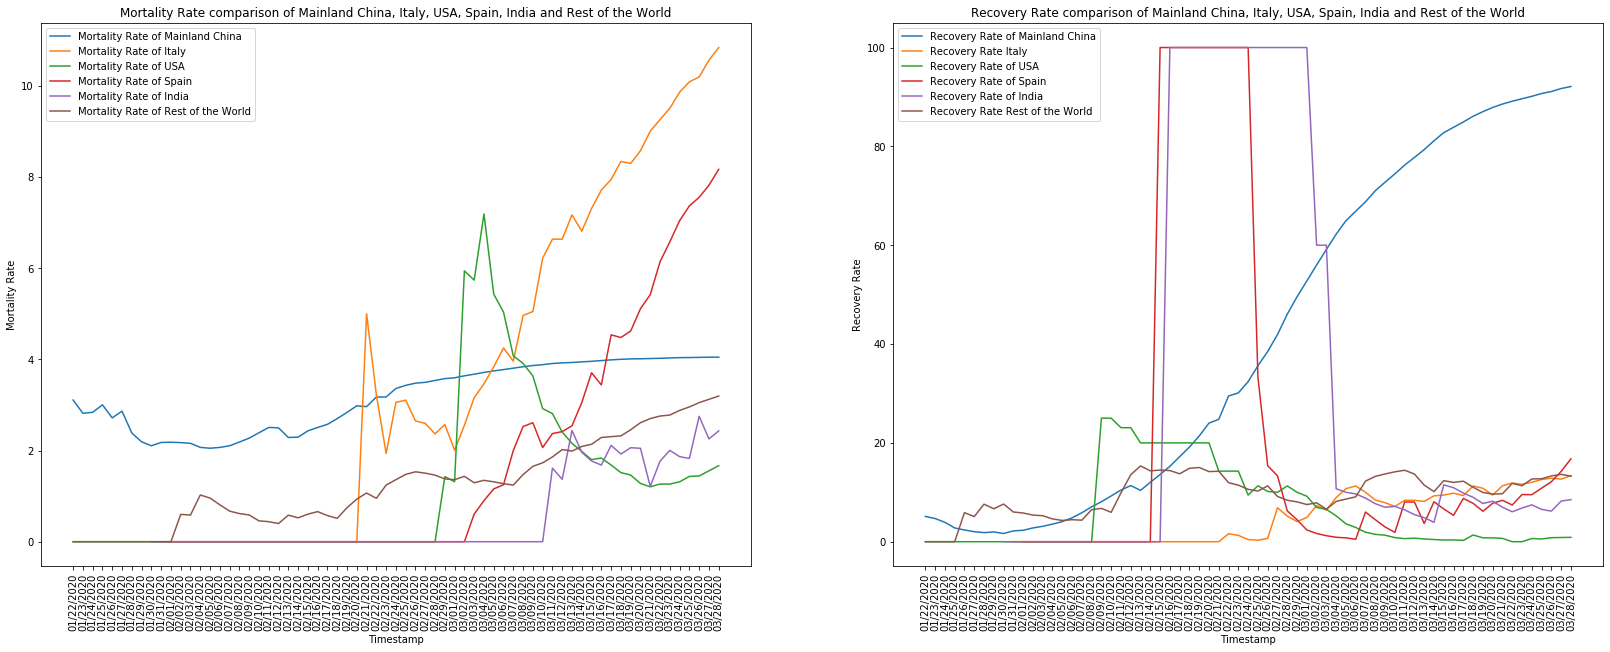

In [18]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (28,10))
ax1.plot(datewise_china["Mortality"], label = "Mortality Rate of Mainland China")
ax1.plot(datewise_Italy["Mortality"], label = "Mortality Rate of Italy")
ax1.plot(datewise_US["Mortality"], label = "Mortality Rate of USA")
ax1.plot(datewise_Spain["Mortality"], label = "Mortality Rate of Spain")
ax1.plot(datewise_India["Mortality"], label = "Mortality Rate of India")
ax1.plot(datewise_restofworld["Mortality"], label = "Mortality Rate of Rest of the World")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy, USA, Spain, India and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
ax2.plot(datewise_china["Recovery"], label = "Recovery Rate of Mainland China")
ax2.plot(datewise_Italy["Recovery"], label = "Recovery Rate Italy")
ax2.plot(datewise_US["Recovery"], label = "Recovery Rate of USA")
ax2.plot(datewise_Spain["Recovery"], label = "Recovery Rate of Spain")
ax2.plot(datewise_India["Recovery"], label = "Recovery Rate of India")
ax2.plot(datewise_restofworld["Recovery"], label = "Recovery Rate Rest of the World")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy, USA, Spain, India and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

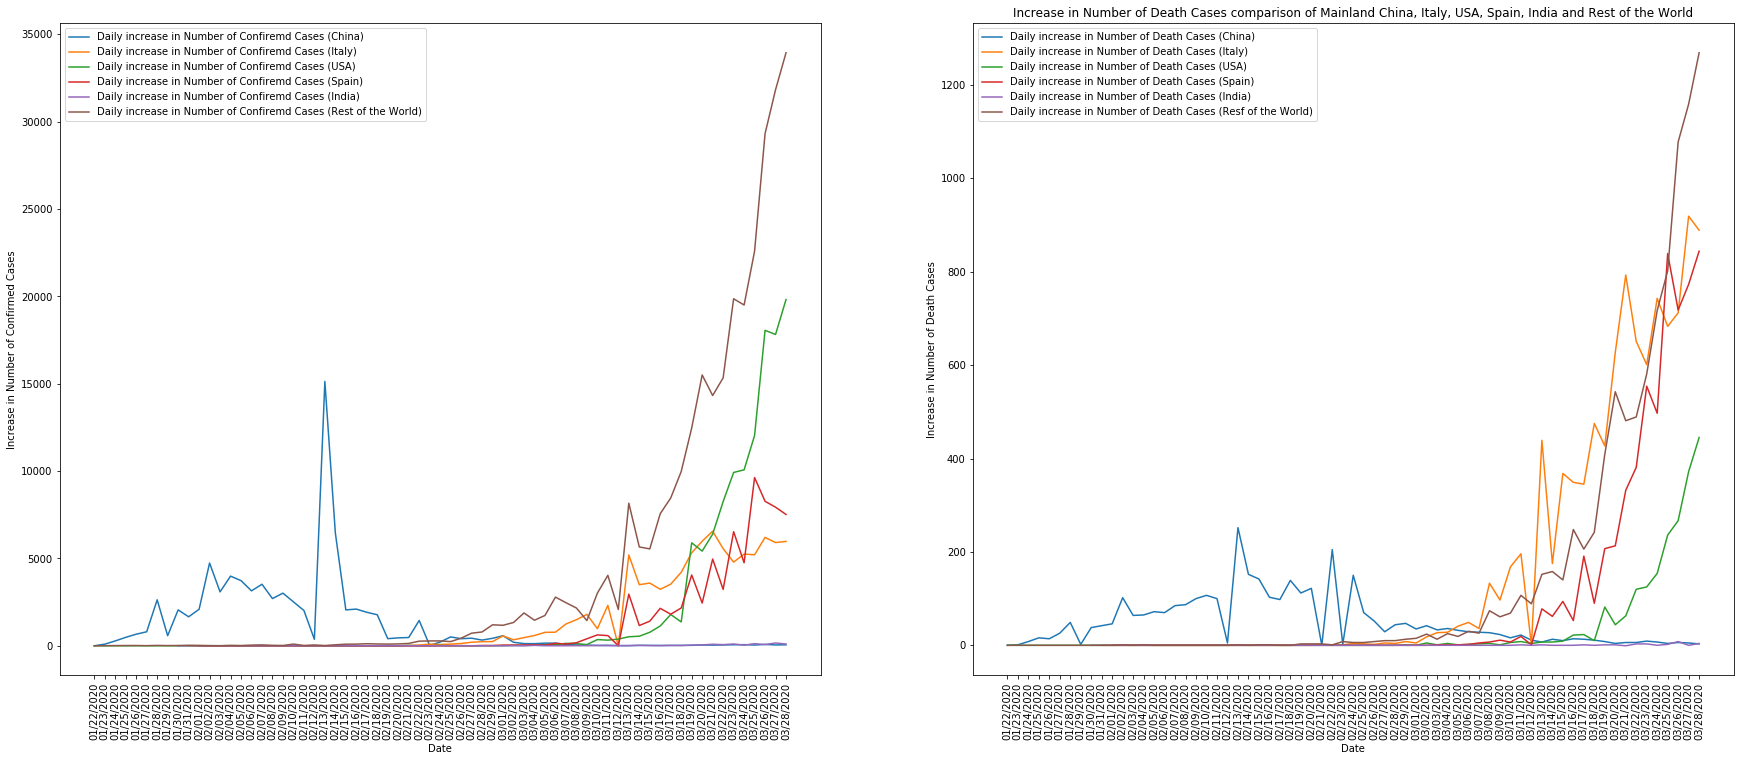

In [19]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (30,12))
ax1.plot(datewise_china["Confirmed"].diff().fillna(0), label = 'Daily increase in Number of Confiremd Cases (China)')
ax1.plot(datewise_Italy["Confirmed"].diff().fillna(0), label = 'Daily increase in Number of Confiremd Cases (Italy)')
ax1.plot(datewise_US["Confirmed"].diff().fillna(0), label = 'Daily increase in Number of Confiremd Cases (USA)')
ax1.plot(datewise_Spain["Confirmed"].diff().fillna(0), label = 'Daily increase in Number of Confiremd Cases (Spain)')
ax1.plot(datewise_India["Confirmed"].diff().fillna(0), label = 'Daily increase in Number of Confiremd Cases (India)')
ax1.plot(datewise_restofworld["Confirmed"].diff().fillna(0), label = 'Daily increase in Number of Confiremd Cases (Rest of the World)')
ax1.set_xlabel('Date')
ax1.set_ylabel("Increase in Number of Confirmed Cases")
ax2.set_title("Increase in Number of Confirmed Cases of Mainland China, Italy, USA, Spain, India and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
ax2.plot(datewise_china["Deaths"].diff().fillna(0), label = 'Daily increase in Number of Death Cases (China)')
ax2.plot(datewise_Italy["Deaths"].diff().fillna(0), label = 'Daily increase in Number of Death Cases (Italy)')
ax2.plot(datewise_US["Deaths"].diff().fillna(0), label = 'Daily increase in Number of Death Cases (USA)')
ax2.plot(datewise_Spain["Deaths"].diff().fillna(0), label='Daily increase in Number of Death Cases (Spain)')
ax2.plot(datewise_India["Deaths"].diff().fillna(0), label='Daily increase in Number of Death Cases (India)')
ax2.plot(datewise_restofworld["Deaths"].diff().fillna(0), label = 'Daily increase in Number of Death Cases (Resf of the World)')
ax2.set_xlabel('Date')
ax2.set_ylabel("Increase in Number of Death Cases")
ax2.set_title("Increase in Number of Death Cases comparison of Mainland China, Italy, USA, Spain, India and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

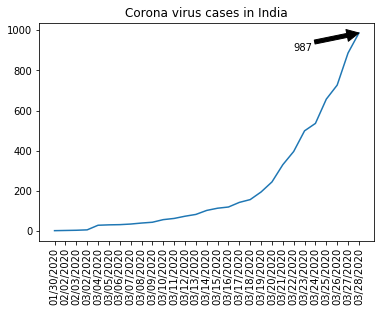

In [20]:
# plotting the number of cases versus date in India
plt.plot(date, patients)
plt.xticks(date, date, rotation = 'vertical')
plt.annotate(str(int(confirmed)), xy = (date[-1], int(confirmed)), xytext = (22, 900), arrowprops = dict(facecolor = 'black', shrink = 0),)
plt.title("Corona virus cases in India")
plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
plt.show()

# clearing the memory
del confirmed
del date
del patients

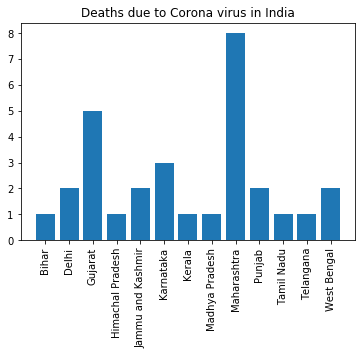

In [21]:
# plotting the number of deaths, state wise, in India
df_deaths.sort_values(by=[0], inplace = True, ascending = True)
plt.bar(df_deaths[0], df_deaths[1])
plt.xticks(df_deaths[0], df_deaths[0], rotation = 'vertical')
plt.title("Deaths due to Corona virus in India")
plt.show()

# clearing the memory
del df_deaths

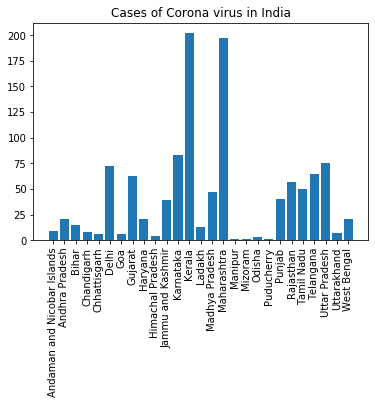

In [22]:
# plotting the number of cases, state wise, in India
df_cases.sort_values(by=[0], inplace = True, ascending = True)
plt.bar(df_cases[0], df_cases[1])
plt.xticks(df_cases[0], df_cases[0], rotation = 'vertical')
plt.title("Cases of Corona virus in India")
plt.show()

# clearing the memory
del df_cases

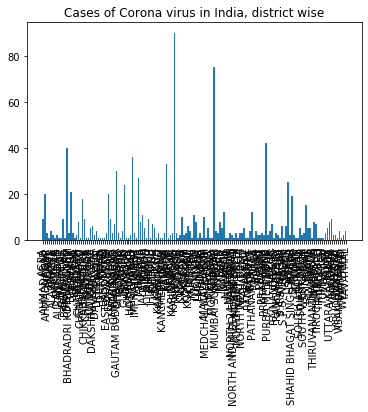

In [23]:
# plotting the number of cases, district wise, in India
indices = []

for index, row in df_district.iterrows():
    if row[0] == "UNKNOWN":
        indices.append(index)

df_district = df_district.drop(indices)

df_district.sort_values(by = [0], inplace = True, ascending = True)
plt.bar(df_district[0], df_district[1])
plt.xticks(df_district[0], df_district[0], rotation = 'vertical')
plt.title("Cases of Corona virus in India, district wise")
plt.show()

# clearing the memory
del indices